# Assignment 2 - Ailerons data set (using ailerons.csv)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("ailerons_train.csv")
print(df.shape)
df.columns

(12250, 41)


Index(['climbRate', 'Sgz', 'p', 'q', 'curPitch', 'curRoll', 'absRoll',
       'diffClb', 'diffRollRate', 'diffDiffClb', 'SeTime1', 'SeTime2',
       'SeTime3', 'SeTime4', 'SeTime5', 'SeTime6', 'SeTime7', 'SeTime8',
       'SeTime9', 'SeTime10', 'SeTime11', 'SeTime12', 'SeTime13', 'SeTime14',
       'diffSeTime1', 'diffSeTime2', 'diffSeTime3', 'diffSeTime4',
       'diffSeTime5', 'diffSeTime6', 'diffSeTime7', 'diffSeTime8',
       'diffSeTime9', 'diffSeTime10', 'diffSeTime11', 'diffSeTime12',
       'diffSeTime13', 'diffSeTime14', 'alpha', 'Se', 'goal'],
      dtype='object')

In [23]:
df.columns.values

array(['climbRate', 'Sgz', 'p', 'q', 'curPitch', 'curRoll', 'absRoll',
       'diffClb', 'diffRollRate', 'diffDiffClb', 'SeTime1', 'SeTime2',
       'SeTime3', 'SeTime4', 'SeTime5', 'SeTime6', 'SeTime7', 'SeTime8',
       'SeTime9', 'SeTime10', 'SeTime11', 'SeTime12', 'SeTime13',
       'SeTime14', 'diffSeTime1', 'diffSeTime2', 'diffSeTime3',
       'diffSeTime4', 'diffSeTime5', 'diffSeTime6', 'diffSeTime7',
       'diffSeTime8', 'diffSeTime9', 'diffSeTime10', 'diffSeTime11',
       'diffSeTime12', 'diffSeTime13', 'diffSeTime14', 'alpha', 'Se',
       'goal'], dtype=object)

In [5]:
df = df[['climbRate', 'Sgz', 'p', 'q', 'curPitch', 'curRoll', 'absRoll',
       'diffClb', 'diffRollRate', 'diffDiffClb', 'SeTime1', 'SeTime2',
       'SeTime3', 'SeTime4', 'SeTime5', 'SeTime6', 'SeTime7', 'SeTime8',
       'SeTime9', 'SeTime10', 'SeTime11', 'SeTime12', 'SeTime13', 'SeTime14',
       'diffSeTime1', 'diffSeTime2', 'diffSeTime3', 'diffSeTime4',
       'diffSeTime5', 'diffSeTime6', 'diffSeTime7', 'diffSeTime8',
       'diffSeTime9', 'diffSeTime10', 'diffSeTime11', 'diffSeTime12',
       'diffSeTime13', 'diffSeTime14', 'alpha', 'Se', 'goal']]
df.head()

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,goal
0,2,-56,-0.33,-0.09,0.90,0.2,-11,12,0.004,-0.1,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.032,-0.0009
1,470,-39,0.02,0.12,0.39,-0.6,-12,8,0.009,-1.6,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.034,-0.0011
2,165,4,0.14,0.14,0.78,0.4,-11,-9,-0.003,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.034,-0.0012
3,-113,5,-0.12,0.11,1.06,0.6,-10,-7,-0.008,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.033,-0.0011
4,-411,-21,-0.17,0.07,1.33,-0.6,-11,0,0.002,0.1,...,0.0,0.0,0.0,0.0,0.0,-0.002,0.0,0.9,0.032,-0.0008


In [6]:
df.isna().sum()

climbRate       0
Sgz             0
p               0
q               0
curPitch        0
curRoll         0
absRoll         0
diffClb         0
diffRollRate    0
diffDiffClb     0
SeTime1         0
SeTime2         0
SeTime3         0
SeTime4         0
SeTime5         0
SeTime6         0
SeTime7         0
SeTime8         0
SeTime9         0
SeTime10        0
SeTime11        0
SeTime12        0
SeTime13        0
SeTime14        0
diffSeTime1     0
diffSeTime2     0
diffSeTime3     0
diffSeTime4     0
diffSeTime5     0
diffSeTime6     0
diffSeTime7     0
diffSeTime8     0
diffSeTime9     0
diffSeTime10    0
diffSeTime11    0
diffSeTime12    0
diffSeTime13    0
diffSeTime14    0
alpha           0
Se              0
goal            0
dtype: int64

<AxesSubplot:>

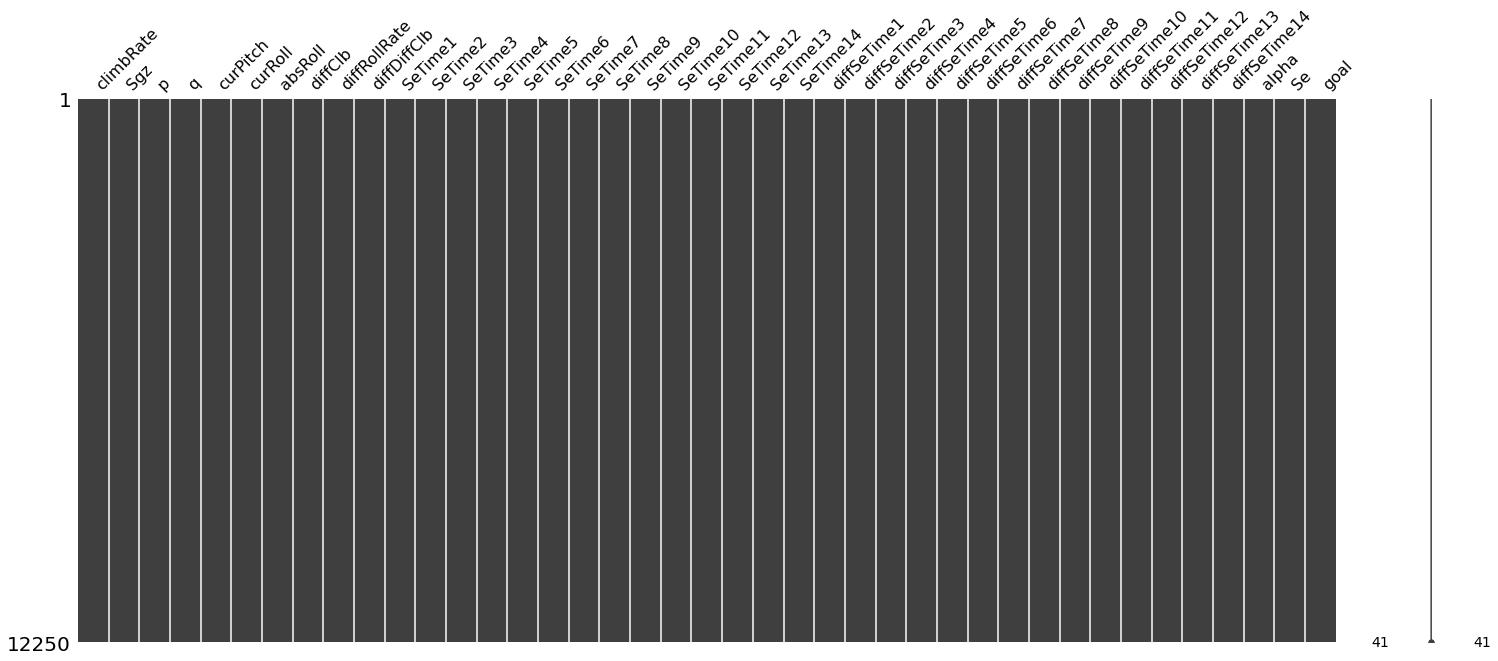

In [8]:
%matplotlib inline
import missingno as msno
msno.matrix(df)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12250 entries, 0 to 12249
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   climbRate     12250 non-null  int64  
 1   Sgz           12250 non-null  int64  
 2   p             12250 non-null  float64
 3   q             12250 non-null  float64
 4   curPitch      12250 non-null  float64
 5   curRoll       12250 non-null  float64
 6   absRoll       12250 non-null  int64  
 7   diffClb       12250 non-null  int64  
 8   diffRollRate  12250 non-null  float64
 9   diffDiffClb   12250 non-null  float64
 10  SeTime1       12250 non-null  float64
 11  SeTime2       12250 non-null  float64
 12  SeTime3       12250 non-null  float64
 13  SeTime4       12250 non-null  float64
 14  SeTime5       12250 non-null  float64
 15  SeTime6       12250 non-null  float64
 16  SeTime7       12250 non-null  float64
 17  SeTime8       12250 non-null  float64
 18  SeTime9       12250 non-nu

In [25]:
df.describe()

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,goal
count,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,...,12250.000000,12250.000000,1.225000e+04,12250.000000,1.225000e+04,12250.000000,1.225000e+04,12250.000000,12250.000000,12250.000000
mean,-9.362939,-12.632408,0.006878,0.061144,0.626213,0.067045,-11.068816,-0.919592,-0.000970,-0.053698,...,0.000000,-0.000103,-5.714286e-07,-0.000100,-6.530612e-07,-0.000096,-3.265306e-07,0.622106,0.021949,-0.000871
std,259.502687,25.727234,0.305488,0.118447,0.312061,0.969050,4.094653,10.405533,0.013352,1.121631,...,0.000013,0.000621,8.806480e-05,0.000644,5.569441e-05,0.000617,3.129801e-05,0.195486,0.006912,0.000404
min,-975.000000,-99.000000,-1.530000,-0.540000,-0.420000,-3.100000,-23.000000,-43.000000,-0.099000,-8.800000,...,-0.001000,-0.006000,-6.000000e-03,-0.006000,-4.000000e-03,-0.006000,-3.000000e-03,0.400000,0.012000,-0.003600
25%,-176.000000,-29.000000,-0.220000,-0.020000,0.420000,-0.600000,-14.000000,-8.000000,-0.009000,-0.300000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.500000,0.018000,-0.001100
50%,-20.000000,-13.000000,0.020000,0.060000,0.610000,0.200000,-11.000000,-1.000000,-0.001000,-0.100000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.600000,0.020000,-0.000800
75%,159.000000,3.000000,0.230000,0.130000,0.800000,0.700000,-8.000000,6.000000,0.008000,0.200000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.700000,0.023000,-0.000600
max,977.000000,94.000000,1.060000,0.620000,2.580000,2.900000,-3.000000,46.000000,0.056000,11.200000,...,0.001000,0.003000,6.000000e-03,0.005000,2.000000e-03,0.007000,1.000000e-03,2.000000,0.073000,-0.000200
